### 무게 찾기
- 목표: 길이(Length) feature를 사용해서 무게(Weight) 예측하기
- dataset: fish.csv
- feature: Length
- label: Weight

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../data/fish.csv'
fish_df = pd.read_csv(path)

In [9]:
idx = fish_df.loc[fish_df['Species'] == 'Perch'].index.to_list()

perch_df = fish_df.loc[idx, ['Weight', 'Length']]
perch_df

,Weight,Length
72,5.9,8.4
73,32.0,13.7
74,40.0,15.0
75,51.5,16.2
76,70.0,17.4
77,100.0,18.0
78,78.0,18.7
79,80.0,19.0
80,85.0,19.6
81,85.0,20.0


In [10]:
perch_df = perch_df.reset_index().drop('index', axis=1)
perch_df.tail()

,Weight,Length
51,1100.0,42.0
52,1000.0,43.0
53,1100.0,43.0
54,1000.0,43.5
55,1000.0,44.0


In [16]:
perch_df.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


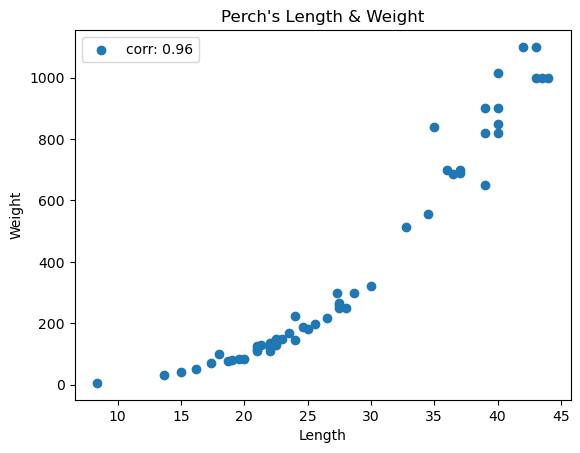

In [18]:
# 둘의 상관관계보기
corr = perch_df.corr()['Length'][0]
plt.scatter(perch_df['Length'], perch_df['Weight'], label=f"corr: {corr:.2f}")


plt.title("Perch's Length & Weight")
plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()

plt.show()

- learning algorithm: KNN Regressor
- feature scaling: True
- preprossing algorithm: MinMaxScaler
- train, test: split, don't consider value_counts rate

In [24]:
# feature & label
feature = perch_df[['Length']]
label = perch_df['Weight']

In [43]:
print(f"feature: {feature.shape}, {feature.ndim}D")
print(f"label: {label.shape}, {label.ndim}")

feature: (56, 1), 2D
label: (56,), 1


In [21]:
from sklearn.model_selection import train_test_split

In [25]:
# train_data & test_data
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.3, random_state=17)

In [42]:
# check
print(f"X_train: {X_train.shape}, {X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")
print()
print(f"X_test: {X_test.shape}, {X_test.ndim}D")
print(f"y_test: {y_test.shape}, {y_test.ndim}D")

X_train: (39, 1), 2D
y_train: (39,), 1D

X_test: (17, 1), 2D
y_test: (17,), 1D


In [41]:
# ratio check
print(len(y_train) / (len(perch_df)) * 100)
print((1 - (len(y_train) / (len(perch_df)))) * 100)


69.64285714285714
30.35714285714286


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()     # min, max, std uesd

In [52]:
scaler.fit(X_train)

MinMaxScaler()

In [54]:
# scelar 전용의 데이터
scaler.min_, scaler.scale_, scaler.data_min_, scaler.data_max_

(array([-0.45214521]), array([0.0330033]), array([13.7]), array([44.]))

In [55]:
# feature scaling
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

- model learning
- optima k: 5?
- find optima k first

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
# defult k id 5
model = KNeighborsRegressor()

In [58]:
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [65]:
# After Learning
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 39, 'euclidean', {})

In [68]:
# find optima k
# k range is 1 to len(X_train)

scores = {}
point_list = []

for k in range(1, model.n_samples_fit_+1):
    model.n_neighbors = k       # Hyperparameter: model accuracy impacted
    score = model.score(X_test_scaled, y_test)
    
    scores[k] = score

In [70]:
print(scores)

{1: 0.9099032993442651, 2: 0.9530328917748614, 3: 0.975824932831454, 4: 0.9770227641616956, 5: 0.9740403803580393, 6: 0.9753502588009862, 7: 0.9621457155004045, 8: 0.951695465891801, 9: 0.9466916218807668, 10: 0.9328404587571428, 11: 0.9334445615055854, 12: 0.9211670400026672, 13: 0.9116255887652294, 14: 0.8957073995084059, 15: 0.872468752527479, 16: 0.8449419412889666, 17: 0.8186925018803162, 18: 0.7939973656529833, 19: 0.7625272056805819, 20: 0.731003490723814, 21: 0.6965835420828551, 22: 0.6619450829983738, 23: 0.6282929081518005, 24: 0.5953946868092534, 25: 0.5627596594905211, 26: 0.5292198144361511, 27: 0.4977916329266312, 28: 0.46495735406347616, 29: 0.4277714293805859, 30: 0.3931534041467256, 31: 0.3574542852918372, 32: 0.3191557507766726, 33: 0.2734191674767992, 34: 0.22940886628629442, 35: 0.17912573750594363, 36: 0.1326446233926335, 37: 0.07324300439994957, 38: 0.017600556031662218, 39: -0.03998829138920845}


In [80]:
sorted_score = sorted(scores.items(), key=lambda x: x[1], reverse=True)
sorted_score[0]

(4, 0.9770227641616956)

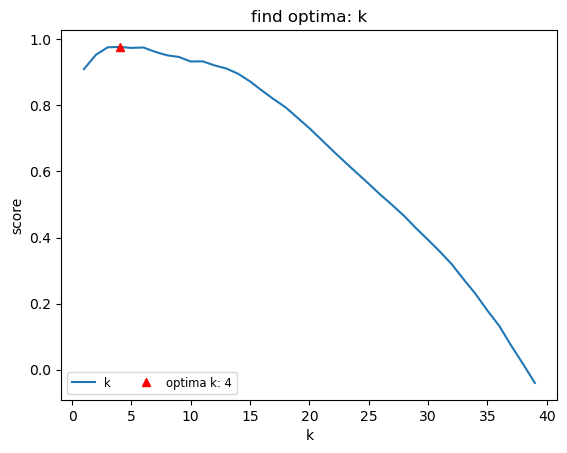

In [83]:
plt.plot(list(scores.keys()), list(scores.values()), label='k')
plt.plot(sorted_score[0][0], sorted_score[0][1], color='red', linestyle='', marker='^', label=f'optima k: {sorted_score[0][0]}')

plt.title('find optima: k')
plt.xlabel('k')
plt.ylabel('score')
plt.legend(loc='lower left', ncol=3, fontsize='small')
plt.show()

In [84]:
# model apply
optima_k = sorted_score[0][0]
model.n_neighbors = optima_k

In [85]:
# 새로운 데이터로 무게 예측하기
new_length = input("농어 길이: ")
print(f"new_length: {new_length}")

new_length: 44


In [86]:
# 2D, scaling
new_data_df = pd.DataFrame([[new_length]], columns=['Length'])
new_data_df

,Length
0,44


In [90]:
scales_new_data = scaler.transform(new_data_df)
scales_new_data

array([[1.]])

In [89]:
# prediction
prediction = model.predict(scales_new_data)
prediction

array([980.])

In [91]:
# neightbors
distance, index = model.kneighbors(scales_new_data)

print(distance, index, sep='\n')

[[0.        0.0330033 0.0660066 0.1320132]]
[[11 20 31  8]]


In [92]:
X_train.iloc[index.reshape(-1)]

,Length
55,44.0
52,43.0
51,42.0
50,40.0


In [94]:
X_train_scaled[index.reshape(-1)]

array([[1.       ],
       [0.9669967],
       [0.9339934],
       [0.8679868]])

In [104]:
y_train = y_train.reset_index(drop=True)

In [105]:
y_train[index.reshape(-1)]

11    1000.0
20    1000.0
31    1100.0
8      820.0
Name: Weight, dtype: float64

In [117]:
scales_new_data

array([[1.]])

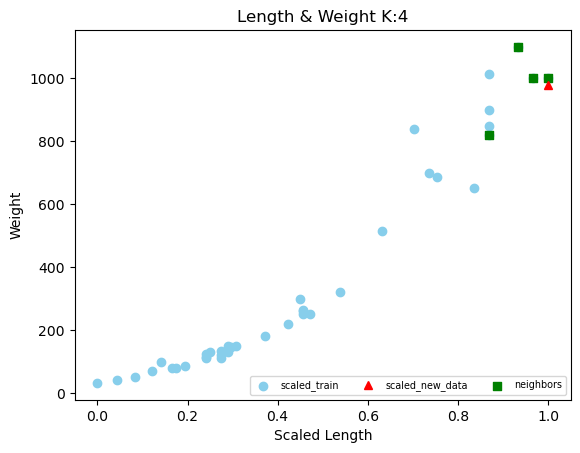

In [122]:
plt.scatter(X_train_scaled, y_train, c='skyblue', label='scaled_train')
plt.plot(scales_new_data[0], prediction[0], color='red', marker='^', linestyle='', label='scaled_new_data')
plt.scatter(X_train_scaled[index.reshape(-1)], y_train[index.reshape(-1)], c='green', marker='s', label='neighbors')

plt.title('Length & Weight K:4')
plt.ylabel('Weight')
plt.xlabel('Scaled Length')
plt.legend(loc='lower right', ncol=4, fontsize='x-small')
plt.show()

#### KNN weakness
- 학습 데이터셋의 범위를 벗어난 더 큰 데이터, 더 작은 데이터의 경우 정확한 예측 불가
    - algorithm delete

In [133]:
# 임의의 데이터
# 작은 값과 큰값에 대해서 이미 존재하는 데이터만 사용함.
# 정확한 예측이 어려움

new_length = 24

new_data_df = pd.DataFrame([[new_length]], columns=['Length'])

scales_new_data = scaler.transform(new_data_df)

prediction = model.predict(scales_new_data)

In [134]:
scales_new_data, prediction

(array([[0.33993399]]), array([151.25]))